In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages
import re

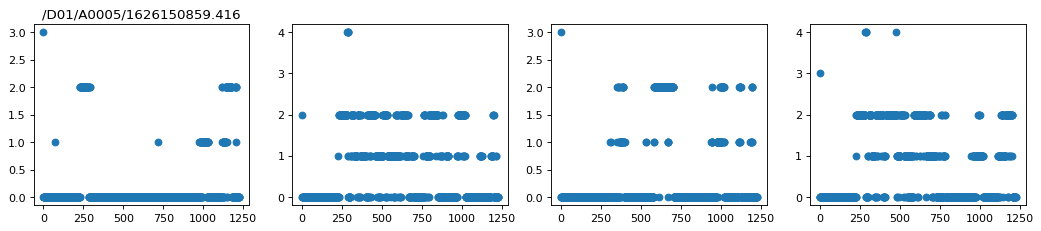

In [2]:
def _load(fn):
    return np.load(fn)['stages']

def _plot(xx, name):
    plt.figure(figsize=(16, 3), dpi=80)
    for kk in range(4):
        plt.subplot(1,4,kk+1)
        if kk==0: plt.title(name)
        plt.scatter(np.arange(xx.shape[1]), xx[kk])

# fn='session_export/D01/A0005/1626150859.416/ds_stages_1626150859.416.npz'
# xx=_load(fn)
# name = re.sub('session_export','',fn)
# name = re.sub('/ds.*','',name)
# _plot(xx,name)

with PdfPages('report.pdf') as pdf:
    fll = [str(xx) for xx in Path('session_export/').rglob('ds_stages*.npz')]
    for fn in fll:
        print(fn)
        name = re.sub('session_export','',fn)
        name = re.sub('/ds.*','',name)
        _plot(_load(fn),name)
        pdf.savefig()
        plt.close()
        # break